In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from scipy.interpolate import interp1d
from matplotlib.colors import LogNorm
from scipy.interpolate import InterpolatedUnivariateSpline
from ji_ji_prime_method2 import*
import mass_function
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})



π = np.pi
Ω_cdm = 0.85
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1808e3           #in units of M☉ pc^-3 with ρ_eq=2.1548e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.5923e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3


               
    
X_min = 1e-7
X_max = 1e5
 
def merger_method_2(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence):
    if  m_1 < m_min: 
        return 0
    
    elif m_2 < m_min:
        return 0
    
    else:
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(4 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
        
        X = np.geomspace(X_min, X_max, 100000) 

    
    
    
        if DM_halos_presence == 'False':
        
        # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .
        
        
            k_nohalo = 19.6157
            A_nohalo = ((ρ_eq**(4/3))*(G**3)*(k_nohalo**7))/(c**5)

            
            def B(m_1,m_2,Δ_1,Δ_2):
                return (A_nohalo**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

            
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
        
            
            def integrand(m_1,m_2,Δ_1,Δ_2, X):
                return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
    

            return (1/(7 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand(m_1,m_2,Δ_1,Δ_2, X),X)) 
     
       
        
        else: 
            beta = 0.75
            gamma  = 0.65
            delta = -0.89   
            m1_ref = 1                   # in units of solar mass.
            m2_ref = 1e-3                # in units of solar mass.

            m = file['arr_0']
            b = file['arr_1']
            a_i_ref = file['arr_2']               # in units of pc
            ji_ref_list = file['arr_3']
            tm_ref_list = file['arr_4']
            
            
            def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
                return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0068*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

            a_i =  a_initial(m_1, m_2, Δ_1, Δ_2, X)
            
            
            def C_ref(m_1,m_2,Δ_1,Δ_2, X):
                return ((a_i/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))
            
            C_ref_arr = C_ref(m_1,m_2,Δ_1,Δ_2, X)
                
            j_c = j_c_interp((C_ref(m_1,m_2,Δ_1,Δ_2, X))/(k(m_1, m_2) * (a_i**4)))
            
            def tm_vaccum(m_1, m_2, a_i, j_c):
                return  k(m_1, m_2) * (a_i**4) * (j_c**7)
            
            
            tm_vaccum_list = tm_vaccum(m_1, m_2, a_i, j_c).tolist()
            
            C_list = C_ref_arr.tolist()
            j_initial_list = np.zeros(len(C_list))
            j_initial_prime_list  = np.zeros(len(C_list))
            
            
            for i, (C, tm_vaccum) in enumerate(zip(C_list, tm_vaccum_list)):
                variable = t_m/C
                
                if variable <= tm_vaccum or variable > tm_ref_list[-1]:
                    j_i = ((variable/k(m_1, m_2))**(1/7))
                    j_i_prime = (j_i/(7 * variable))
                    
                elif tm_vaccum < variable <= tm_ref_list[0]:
                    
                    j_i = ji_into_C_fitting_function(m, b, t_m) / (C**(1/m))   # t_m = (j_i**m) * (10**b)
                    j_i_prime = ji_into_C_prime_fitting_function(m, b, t_m) / (C**(1/m)) 
                  
                
                else:        # tm_ref_list[0] < variable <= tm_ref_list[-1]:
                    
                    x = tm_ref_list
                    y = ji_ref_list
                    j_i = ji_interpolation(x, y, variable)
                    j_i_prime = ji_prime_into_C_interpolation(x, y, variable)/C
                        
                #else: 
                    #j_i =   1    #Used as 1 instead of zero to avoid the divide by zero error in the integrand.                          
                    #j_i_prime =   0                      
                
                
                j_initial_list[i]       =  j_i
                j_initial_prime_list[i] =  j_i_prime
                
            
            j_initial = np.array(j_initial_list) 
            j_initial_prime = np.array(j_initial_prime_list)
            
            
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03062*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            
            
            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return np.sqrt(2) * (np.sqrt(3/(8*π*G*ρ_eq))) * (((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3))


            def ρ_bar(m):
                return  (1/2)  *  (ρ_eq * Ω_cdm)   *    (t_eq**(3/2))   *   ((2*G*m)**(3/4)) 

            
            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))

            
            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))
            
   
            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))

            # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉.
            
            def D_halo(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0861 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.0696 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X_halo(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4087 * np.sqrt(f**2 + 0.5192 * (σ_eq**2)) * D_halo(m_1, m_2, Δ_1, Δ_2, X) * np.sqrt((m_1 + m_2)/ M_binary_initial(m_1, m_2, Δ_1, Δ_2, X)) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):    
                return j_initial/ j_X_halo(m_1, m_2, Δ_1, Δ_2, X)

            
            
            def integrand_halo(m_1,m_2,Δ_1,Δ_2, X):
                return j_initial_prime * (1/j_initial) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            
            return  ρ_m * (((f**2)* (m_1 + m_2))/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2) *   (np.trapz(integrand_halo(m_1,m_2,Δ_1,Δ_2, X),X))       



In [2]:
# Merger rates for Lognormal PDF of PBH masses from m_min = 5 M☉ - m_max = 100 M☉. 

bin_centres = np.geomspace(6, 91, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 

deltas = np.diff(bin_edges)


Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()


m_1 = np.geomspace(6, 91, 16)
m_2 = np.geomspace(6, 91, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   

m_1_list = [np.ceil(m_1) for m_1 in m_1_list]
m_2_list = [np.ceil(m_2) for m_2 in m_2_list]
    

Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)



m_min = 5     #in units of M☉
m_max = 100   #in units of M☉



m_1 = [6.0, 8.0, 9.0, 11.0, 13.0, 15.0, 18.0, 22.0, 26.0, 31.0, 37.0, 45.0, 53.0, 64.0, 76.0, 91.0] M☉

Δ_1 = [1.08912979, 1.30558649, 1.56506239, 1.87610726, 2.24897006, 2.69593666, 3.23173464, 3.87401861, 4.64395189, 5.56690386, 6.67328589, 7.99955337, 9.58940696, 11.49523249, 13.77982711, 16.51846845]


In [3]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'False'
Merger_Lognormal_nohalo = np.zeros((16, 16))
merger_sum = 0


for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1.67e-3
        f = 0.85*f_pbh
   
        def P(m):                  #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
            return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))


        if i==j:
            Merger_Lognormal_nohalo[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_Lognormal_nohalo[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
                
                merger_sum +=  0
        
        else:
                merger_sum +=  Merger_Lognormal_nohalo[i,j]
            

print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_Lognormal_nohalo", Merger_Lognormal_nohalo)

Merger = 44.83787460908123 Gpc⁻3 yr⁻1


In [4]:

# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'True'
Merger_Lognormal_halo_method_2 = np.zeros((16, 16))
merger_sum = 0


for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1.67e-3
        f = 0.85*f_pbh
   
        def P(m):                  #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
            return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))


        if i==j:
            Merger_Lognormal_halo_method_2[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_Lognormal_halo_method_2[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        if m_1 < m_2:
                
                merger_sum +=  0
        
        else:
                merger_sum +=  Merger_Lognormal_halo_method_2[i,j]
            

print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_Lognormal_halo_method_2", Merger_Lognormal_halo_method_2)

Merger = 0.001999045080169877 Gpc⁻3 yr⁻1


In [5]:
# Merger rates for Power Law of PBH masses from m_min = 1e-2 M☉ - m_max = 100 M☉. 

In [5]:
bin_centres = np.geomspace(2e-2, 78, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-2, 78, 16)
m_2 = np.geomspace(2e-2, 78, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
 
 
    
    
m_1_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78]  
m_2_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] 


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 1e-2  #in units of M☉
m_max = 100   #in units of M☉



m_1 = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] M☉

Δ_1 = [0.0111651, 0.01937612, 0.03362569, 0.05835466, 0.10126977, 0.17574547, 0.30499199, 0.52928885, 0.91853783, 1.59404786, 2.76634068, 4.80075972, 8.33132886, 14.45834503, 25.09128432, 43.54388745]


In [6]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution with f_pbh = 2.53e-2. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_PWR_nohalo = np.zeros((16, 16))
merger_sum = 0

for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 2.53e-2      #choosen as per microlensing constraints
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2      #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR_nohalo[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR_nohalo[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR_nohalo[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR_nohalo", Merger_PWR_nohalo)

Merger = 509454.5610397835 Gpc⁻3 yr⁻1


In [7]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution with f_pbh = 2.53e-2.
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'True'
Merger_PWR_halo_method_2 = np.zeros((16, 16))
merger_sum = 0


for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 2.53e-2      #choosen as per microlensing constraints
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2     #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR_halo_method_2[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR_halo_method_2[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR_halo_method_2[i,j]


print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR_halo_method_2", Merger_PWR_halo_method_2)

Merger = 0.04851319300931548 Gpc⁻3 yr⁻1


In [9]:
# Merger rates  for the range of PBH masses from m_min = 1e-4 M☉ - m_max = 100 M☉ using
# multipeak PDF of the paper https://arxiv.org/abs/2207.07576 . 

In [8]:
bin_centres = np.geomspace(2e-4, 69, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-4, 69, 16)
m_2 = np.geomspace(2e-4, 69, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.4f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.4f')), m_2_list)) 



m_1_list = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5, 
             12, 29, 69] 


m_2_list = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5,  
             12, 29, 69]



Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_min = 1e-4
m_max = 100


m_1 = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5, 12, 29, 69] M☉

Δ_1 = [0.00017518, 0.0004099, 0.00095911, 0.00224417, 0.00525102, 0.0122866, 0.0287488, 0.06726787, 0.15739669, 0.36828457, 0.86173051, 2.01631977, 4.71788496, 11.03914116, 25.82992984, 60.43815056]


In [10]:
# Calculation of the 2D merger rate for multipeak PDF of the paper https://arxiv.org/abs/2207.07576 . 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_multipeak_PDF_nohalo = np.zeros((16, 16))


merger_sum = 0
for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = mass_function.f_PBH      
        f = 0.85*f_pbh
   
        def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
            return mass_function.new_PDF(m)


        if i==j:
            Merger_multipeak_PDF_nohalo[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_multipeak_PDF_nohalo[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_multipeak_PDF_nohalo[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_multipeak_PDF_nohalo", Merger_multipeak_PDF_nohalo)

/tmp/ipykernel_155477/3992096381.py:63: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of


Merger = 638723.4326198366 Gpc⁻3 yr⁻1


In [11]:
# Calculation of the 2D merger rate for mass function of the paper https://arxiv.org/abs/2207.07576 . 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'True'
Merger_multipeak_PDF_halo_method_2 = np.zeros((16, 16))


merger_sum = 0
for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = mass_function.f_PBH      
        f = 0.85*f_pbh
   
        def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
            return mass_function.new_PDF(m)


        if i==j:
            Merger_multipeak_PDF_halo_method_2[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_multipeak_PDF_halo_method_2[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_multipeak_PDF_halo_method_2[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_multipeak_PDF_halo_method_2", Merger_multipeak_PDF_halo_method_2)

/tmp/ipykernel_155477/3992096381.py:63: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of


Merger = 722617.0875825987 Gpc⁻3 yr⁻1


In [13]:
# Merger rate for Powerlaw PBH mass distribution using f_pbh = 1e-5, 1e-4, 1e-3 and 1e-2.

In [12]:
bin_centres = np.geomspace(2e-2, 78, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-2, 78, 16)
m_2 = np.geomspace(2e-2, 78, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
 
 
    
    
m_1_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78]  
m_2_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] 


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 1e-2  #in units of M☉
m_max = 100   #in units of M☉


m_1 = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] M☉

Δ_1 = [0.0111651, 0.01937612, 0.03362569, 0.05835466, 0.10126977, 0.17574547, 0.30499199, 0.52928885, 0.91853783, 1.59404786, 2.76634068, 4.80075972, 8.33132886, 14.45834503, 25.09128432, 43.54388745]


In [13]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution with f_pbh = 1e-5. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_PWR1_nohalo = np.zeros((16, 16))
merger_sum = 0

for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-5      #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2      #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR1_nohalo[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR1_nohalo[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR1_nohalo[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR1_nohalo", Merger_PWR1_nohalo)

Merger = 0.18470575914793058 Gpc⁻3 yr⁻1


In [14]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution with f_pbh = 1e-5.
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'True'
Merger_PWR1_halo_method_2 = np.zeros((16, 16))
merger_sum = 0


for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-5      #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2     #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR1_halo_method_2[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR1_halo_method_2[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR1_halo_method_2[i,j]


print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR1_halo_method_2", Merger_PWR1_halo_method_2)

Merger = 0.8530719055258343 Gpc⁻3 yr⁻1


In [15]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution with f_pbh = 1e-4. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_PWR2_nohalo = np.zeros((16, 16))
merger_sum = 0

for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-4      #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2      #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR2_nohalo[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR2_nohalo[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR2_nohalo[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR2_nohalo", Merger_PWR2_nohalo)

Merger = 18.443060358406672 Gpc⁻3 yr⁻1


In [16]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution with f_pbh = 1e-4.
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.



DM_halos_presence = 'True'
Merger_PWR2_halo_method_2 = np.zeros((16, 16))
merger_sum = 0


for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-4      #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2     #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR2_halo_method_2[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR2_halo_method_2[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR2_halo_method_2[i,j]


print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR2_halo_method_2", Merger_PWR2_halo_method_2)

Merger = 0.08873928950050773 Gpc⁻3 yr⁻1


In [17]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution with f_pbh = 1e-3. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_PWR3_nohalo = np.zeros((16, 16))
merger_sum = 0

for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-3      #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2      #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR3_nohalo[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR3_nohalo[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR3_nohalo[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR3_nohalo", Merger_PWR3_nohalo)

Merger = 1811.2635250695569 Gpc⁻3 yr⁻1


In [18]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution with f_pbh = 1e-3.
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.



DM_halos_presence = 'True'
Merger_PWR3_halo_method_2 = np.zeros((16, 16))
merger_sum = 0


for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-3      #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2     #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR3_halo_method_2[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR3_halo_method_2[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR3_halo_method_2[i,j]


print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR3_halo_method_2", Merger_PWR3_halo_method_2)

Merger = 0.005050311262972452 Gpc⁻3 yr⁻1


In [19]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution using f_pbh = 1e-2.
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_PWR4_nohalo = np.zeros((16, 16))


merger_sum = 0
for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-2   #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2      #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR4_nohalo[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR4_nohalo[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        
        if m_1 < m_2:
            
            merger_sum += 0
        
        else:
            merger_sum += Merger_PWR4_nohalo[i,j]


        
print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR4_nohalo", Merger_PWR4_nohalo)

Merger = 125385.81156067936 Gpc⁻3 yr⁻1


In [20]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution using f_pbh = 1e-2.
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'True'
Merger_PWR4_halo_method_2 = np.zeros((16, 16))
merger_sum = 0


for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    
    for j, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        
        f_pbh = 1e-2    #choosen as an arbitrary value for now
        f = 0.85*f_pbh
   
        def P(m):     #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-2      #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))


        if i==j:
            Merger_PWR4_halo_method_2[i, j] = 0.5 * merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence) 
            
        else:
            Merger_PWR4_halo_method_2[i, j] = merger_method_2(m_1, m_2, Δ_1 , Δ_2, t_m, DM_halos_presence)
        
        if m_1 < m_2:
            
            merger_sum  += 0
        
        else:
            merger_sum  += Merger_PWR4_halo_method_2[i,j]



print("Merger =", merger_sum, 'Gpc⁻3 yr⁻1')
np.save("Merger_PWR4_halo_method_2", Merger_PWR4_halo_method_2)

Merger = 0.03957345227705871 Gpc⁻3 yr⁻1


In [23]:
# Merger rate plots for Lognormal PDF in mass range (5 - 100) M_sun.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
import mass_function
from matplotlib.ticker import LogFormatter 
import matplotlib.ticker as tkr
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    
   

bin_centres = np.geomspace(6, 91, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)


Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()


m_1 = np.geomspace(6, 91, 16)
m_2 = np.geomspace(6, 91, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = [np.ceil(m_1) for m_1 in m_1_list]
m_2_list = [np.ceil(m_2) for m_2 in m_2_list]
    
m_1_list = [('%f' % m_1).rstrip('0').rstrip('.') for m_1 in m_1_list]
m_2_list = [('%f' % m_2).rstrip('0').rstrip('.') for m_2 in m_2_list]
   

Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)



m_min = 5     #in units of M☉
m_max = 100   #in units of M☉


def tick(x):
    n = np.floor(np.log10(x))
    str1 = ""
    m = x*(10.0**(-n))
    if (n >= -100 ): #and n!=0 and n!=-1
        str_f =  r'$10^{%d}$' % n 
        return  str_f
    else:
        str_f = x
    return str_f


m_1 = ['6', '8', '9', '11', '13', '15', '18', '22', '26', '31', '37', '45', '53', '64', '76', '91'] M☉

Δ_1 = [1.08912979, 1.30558649, 1.56506239, 1.87610726, 2.24897006, 2.69593666, 3.23173464, 3.87401861, 4.64395189, 5.56690386, 6.67328589, 7.99955337, 9.58940696, 11.49523249, 13.77982711, 16.51846845]


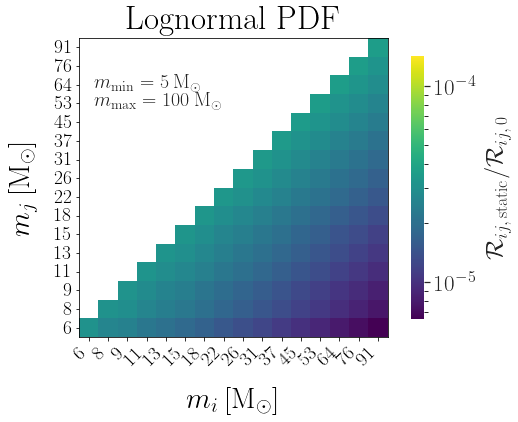

In [2]:
# Ratio of merger rate for binaries with and without DM halos for
# Lognormal PDF in mass range (5 - 100) M_sun.

Merger_Lognormal_nohalo = np.load('Merger_Lognormal_nohalo.npy')
Merger_Lognormal_halo_method_2 = np.load('Merger_Lognormal_halo_method_2.npy')




Merger_Lognormal_ratio_1 = np.divide(Merger_Lognormal_halo_method_2, Merger_Lognormal_nohalo)

mask = np.tril(np.ones((16,  16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize = (7, 5.5))  




sns.set(font_scale = 2.1)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



vmin = np.min(Merger_Lognormal_ratio_1)
vmax = np.max(Merger_Lognormal_ratio_1)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_Lognormal_ratio_1, mask = mask,  cmap = 'viridis', cbar = True,  norm = norm, 
                 cbar_kws = { "shrink": 0.88, "pad": 0.06})

cbar = ax.collections[0].colorbar
cbar.set_label('$\mathcal{R}_{ij,\,\mathrm{static}}/\mathcal{R}_{ij,\,0}$' , labelpad = 10)





ax.set_xticklabels(m_1_list, rotation = 45, fontsize = 58, ha = 'right')
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 58)


ax.text(0.8, 13.4, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 12.4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(0.8)


ax.invert_yaxis()
plt.xticks(fontsize = 19.6)
plt.yticks(fontsize = 19.6)
plt.xlabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)  # m_i = m_1, m_j = m_2
plt.ylabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)
plt.title('Lognormal PDF', fontsize = 33, pad = 9)
plt.savefig('rstLogNormalPDF1.pdf', bbox_inches = 'tight')
plt.show()  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from matplotlib.colors import LogNorm
from scipy.interpolate import InterpolatedUnivariateSpline
import ji_ji_prime_method2
import mass_function
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})



bin_centres = np.geomspace(2e-2, 78, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])

ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 

deltas = np.diff(bin_edges)

Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(2e-2, 78, 16)
m_2 = np.geomspace(2e-2, 78, 16)

m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   

m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
 
m_1_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78]  
m_2_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] 


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 1e-2  #in units of M☉
m_max = 100   #in units of M☉


def sciformat_3(x):
    n = np.floor(np.log10(x))
    str1 = ""
    if (n <= -2):
        m = x*(10.0**(-n))
        str1 = r'$%d \times ' % (m,)
        str2 = r'10^{%d}$' % n
        str_f = str1 + str2
        return str1 + str2
    else:
        str_f = x
    return str_f

xlabel_list = np.zeros(len(m_1_list), dtype ='U100')
ylabel_list = np.zeros(len(m_2_list), dtype ='U100')

for i, x in enumerate(m_1_list):
    xlabel_list[i] = sciformat_3(x)
    
for i, x in enumerate(m_2_list):
    ylabel_list[i] = sciformat_3(x)

    
print('\v')    
print("x_label =", xlabel_list)


def tick(x):
    n = np.floor(np.log10(x))
    str1 = ""
    m = x*(10.0**(-n))
    if (n >= -100 ): #and n!=0 and n!=-1
        str_f = r'$10^{%d}$' % n 
        return  str_f
    else:
        str_f = x
    return str_f


m_1 = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] M☉

Δ_1 = [0.0111651, 0.01937612, 0.03362569, 0.05835466, 0.10126977, 0.17574547, 0.30499199, 0.52928885, 0.91853783, 1.59404786, 2.76634068, 4.80075972, 8.33132886, 14.45834503, 25.09128432, 43.54388745]

x_label = ['$2 \\times 10^{-2}$' '$3 \\times 10^{-2}$' '$6 \\times 10^{-2}$' '0.1'
 '0.2' '0.3' '0.6' '1' '2' '3' '5' '9' '15' '26' '45' '78']


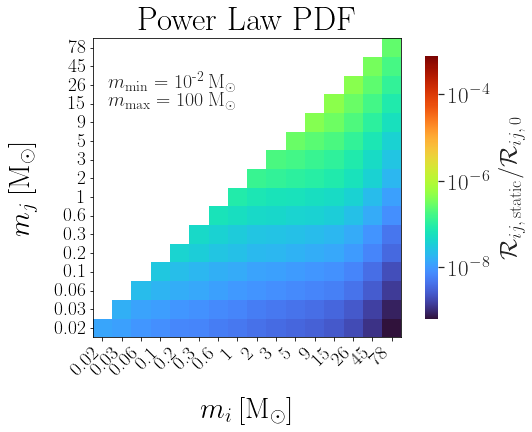

In [2]:
# Plot of merger ratio for Power Law PDF in mass range (1e-2 - 100) M_sun using f_pbh = 2.53e-2.


Merger_PWR_nohalo = np.load('Merger_PWR_nohalo.npy')
Merger_PWR_halo_method_2 = np.load('Merger_PWR_halo_method_2.npy')

Merger_PWR_ratio_1 = np.divide(Merger_PWR_halo_method_2, Merger_PWR_nohalo)



mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
#fig,ax = plt.subplots(figsize=(185, 145.5))  
fig,ax = plt.subplots(figsize=(7, 5.5)) 

sns.set(font_scale = 2.1)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


vmin =  np.min(Merger_PWR_ratio_1)  #np.min(Merger_PWR_ratio_1)
vmax = np.max(Merger_PWR_ratio_1)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_PWR_ratio_1, mask = mask,  cmap = 'turbo', cbar = True, norm = norm,
                 cbar_kws = {"shrink": 0.88,"pad": 0.06},
                 fmt = '0.8f')

cbar = ax.collections[0].colorbar
cbar.set_label('$\mathcal{R}_{ij,\, \mathrm{static}}/\mathcal{R}_{ij,\,0}$' , labelpad = 10)



ax.set_xticklabels(m_1_list, rotation = 45, fontsize = 10, ha = 'right')
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)



ax.text(0.8, 13.4, "$m_\mathrm{{min}} = 10\\textsuperscript{-2} \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 12.4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(0.8)


ax.invert_yaxis()
plt.xticks(fontsize = 19.6)
plt.yticks(fontsize = 19.6)
plt.xlabel('$m_{i}\:[\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)   # m_j = m_2
plt.ylabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Power Law PDF', fontsize = 33, pad = 9)
plt.savefig('rstPWRLawPDF1.pdf', bbox_inches = 'tight')
plt.show()       

In [3]:
# Merger rates plots for the range of PBH masses from m_min = 1e-4 M☉ - m_max = 100 M☉ using
# multipeak PDF of the paper https://arxiv.org/abs/2207.07576 . 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from matplotlib.colors import LogNorm
from scipy.interpolate import InterpolatedUnivariateSpline
import ji_ji_prime_method2
import mass_function
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

bin_centres = np.geomspace(2e-4, 69, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-4, 69, 16)
m_2 = np.geomspace(2e-4, 69, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.4f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.4f')), m_2_list)) 



m_1_list = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5, 
             12, 29, 69] 


m_2_list = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5,  
             12, 29, 69]



Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_min = 1e-4
m_max = 100


def sciformat_3(x):
    n = np.floor(np.log10(x))
    m = x*(10.0**(-n))
    str1 = ""
    if (n <= -3 and m > 1):
        str1 = r'$%d \times ' % (m,)
        str2 = r'10^{%d}$' % n
        str_f = str1 + str2
        return str1 + str2
    elif (n <= -3 and m == 1):
        str2 = r'$10^{%d}$' % n
        str_f =  str2
        return  str2
    else:
        str_f = x
    return str_f

xlabel_list = np.zeros(len(m_1_list), dtype ='U100')
ylabel_list = np.zeros(len(m_2_list), dtype ='U100')

for i, x in enumerate(m_1_list):
    xlabel_list[i] = sciformat_3(x)
    
for i, x in enumerate(m_2_list):
    ylabel_list[i] = sciformat_3(x)

print('\v')
print("x_label =", xlabel_list)


def tick(x):
    n = np.floor(np.log10(x))
    str1 = ""
    m = x*(10.0**(-n))
    if (n >= -100 ): #and n!=0 and n!=-1
        str_f = r'$10^{%d}$' % n 
        return  str_f
    else:
        str_f = x
    return str_f

ticks = [1e-3, 1e-2, 0.1, 1, 10, 60]
tick_list = np.zeros(len(ticks), dtype ='U100')
for i, x in enumerate(ticks):
    if i > 3:
        tick_list[i] = x
    else:
         tick_list[i] = tick(x)


m_1 = [0.0002, 0.0005, 0.001, 0.003, 0.006, 0.01, 0.03, 0.08, 0.2, 0.4, 1, 2, 5, 12, 29, 69] M☉

Δ_1 = [0.00017518, 0.0004099, 0.00095911, 0.00224417, 0.00525102, 0.0122866, 0.0287488, 0.06726787, 0.15739669, 0.36828457, 0.86173051, 2.01631977, 4.71788496, 11.03914116, 25.82992984, 60.43815056]

x_label = ['$2 \\times 10^{-4}$' '$5 \\times 10^{-4}$' '$10^{-3}$'
 '$3 \\times 10^{-3}$' '$6 \\times 10^{-3}$' '0.01' '0.03' '0.08' '0.2'
 '0.4' '1' '2' '5' '12' '29' '69']


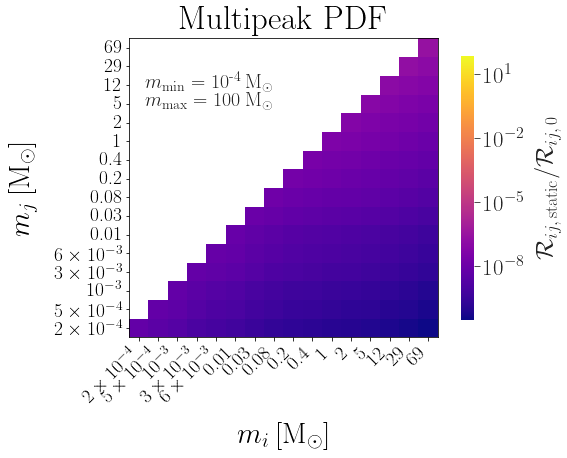

In [2]:
# Plot of merger rate for multipeak PDF of the paper https://arxiv.org/abs/2207.07576 . 


Merger_multipeak_PDF_nohalo = np.load('Merger_multipeak_PDF_nohalo.npy')
Merger_multipeak_PDF_halo_method_2 = np.load('Merger_multipeak_PDF_halo_method_2.npy')


Merger_multipeak_PDF_ratio_1 = np.divide(Merger_multipeak_PDF_halo_method_2, Merger_multipeak_PDF_nohalo)



mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(7, 5.5))  


sns.set(font_scale = 2.1)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'



vmin = np.min(Merger_multipeak_PDF_ratio_1)
vmax = np.max(Merger_multipeak_PDF_ratio_1)
norm = LogNorm(vmin, vmax)



ax = sns.heatmap(Merger_multipeak_PDF_ratio_1, mask = mask,  cmap = 'plasma', cbar = True, norm = norm,
                 cbar_kws = {"shrink": 0.88,"pad": 0.06},
                 fmt = '0.8f')



cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize= 23, length= 5.5, width= 0.8, which="major")
cbar.ax.tick_params(labelsize= 23, length= 0, width= 0, which="minor")
cbar.set_label('$\mathcal{R}_{ij,\,\mathrm{static}}/\mathcal{R}_{ij,\,0}$' , labelpad = 10)


ax.set_xticklabels(xlabel_list, rotation = 45, fontsize = 285, ha = 'right')
ax.set_yticklabels(ylabel_list,rotation = 360, fontsize = 300)



ax.text(0.8, 13.4, "$m_\mathrm{{min}} = 10\\textsuperscript{-4} \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 12.4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(0.8)


ax.invert_yaxis()
plt.xticks(fontsize = 19.6)
plt.yticks(fontsize = 19.6)
plt.xlabel('$m_{i}\:[\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)   # m_j = m_2
plt.ylabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Multipeak PDF', fontsize = 33, pad = 9)
plt.savefig('rstmultipeakPDF1.pdf', bbox_inches = 'tight')
plt.show() 

In [3]:
#Setting up the same scale for merger ratio plots for different f_pbh values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from matplotlib.colors import LogNorm
from scipy.interpolate import InterpolatedUnivariateSpline
import ji_ji_prime_method2
import mass_function
import matplotlib.ticker as tkr
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})



bin_centres = np.geomspace(2e-2, 78, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-2, 78, 16)
m_2 = np.geomspace(2e-2, 78, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
 
 
    
    
m_1_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78]  
m_2_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] 


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 1e-2  #in units of M☉
m_max = 100   #in units of M☉


def sciformat_3(x):
    n = np.floor(np.log10(x))
    str1 = ""
    if (n <= -2):
        m = x*(10.0**(-n))
        str1 = r'$%d \times ' % (m,)
        str2 = r'10^{%d}$' % n
        str_f = str1 + str2
        return str1 + str2
    else:
        str_f = x
    return str_f

xlabel_list = np.zeros(len(m_1_list), dtype ='U100')
ylabel_list = np.zeros(len(m_2_list), dtype ='U100')

for i, x in enumerate(m_1_list):
    xlabel_list[i] = sciformat_3(x)
    
for i, x in enumerate(m_2_list):
    ylabel_list[i] = sciformat_3(x)

    
print('\v')    
print("x_label =", xlabel_list)

Merger_PWR1_halo_method_2 = np.load('Merger_PWR1_halo_method_2.npy')
Merger_PWR1_nohalo = np.load('Merger_PWR1_nohalo.npy')
Merger_PWR11_ratio = np.divide(Merger_PWR1_halo_method_2, Merger_PWR1_nohalo)


Merger_PWR3_nohalo = np.load('Merger_PWR3_nohalo.npy')
Merger_PWR3_halo_method_2 = np.load('Merger_PWR3_halo_method_2.npy')
Merger_PWR33_ratio = np.divide(Merger_PWR3_halo_method_2, Merger_PWR3_nohalo)

vmin = np.min(Merger_PWR33_ratio)
vmax = np.max(Merger_PWR11_ratio)
norm = LogNorm(vmin, vmax)
print("vmin =", vmin)
print("vmax =", vmax)


def tick(x):
    n = np.floor(np.log10(x))
    m = x*(10.0**(-n))
    str1 = ""
    if (n >= -100 and m > 1):
        str1 = r'$%d \times ' % (m,)
        str2 = r'10^{%d}$' % n
        str_f = str1 + str2
        return str1 + str2
    elif (n >= -100 and m == 1):
        str2 = r'$10^{%d}$' % n
        str_f =  str2
        return  str2
    else:
        str_f = x
    return str_f


ticks =  [5e-9, 1e-7, 1e-5,  1e-3, 0.1, 10, 200]
tick_list = np.zeros(len(ticks), dtype ='U100')
for i, x in enumerate(ticks):
    tick_list[i] = tick(x)


m_1 = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] M☉

Δ_1 = [0.0111651, 0.01937612, 0.03362569, 0.05835466, 0.10126977, 0.17574547, 0.30499199, 0.52928885, 0.91853783, 1.59404786, 2.76634068, 4.80075972, 8.33132886, 14.45834503, 25.09128432, 43.54388745]

x_label = ['$2 \\times 10^{-2}$' '$3 \\times 10^{-2}$' '$6 \\times 10^{-2}$' '0.1'
 '0.2' '0.3' '0.6' '1' '2' '3' '5' '9' '15' '26' '45' '78']
vmin = 2.581448003908452e-09
vmax = 266.4361707973393


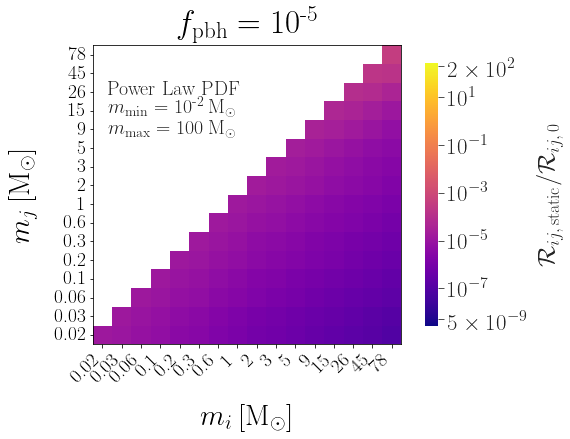

In [3]:
# Plot of merger ratios for binaries without DM halos and with DM spikes
# having Power Law PDF in mass range (1e-2 - 100) M_sun using f_pbh = 1e-5.


Merger_PWR1_halo_method_2 = np.load('Merger_PWR1_halo_method_2.npy')
Merger_PWR1_nohalo = np.load('Merger_PWR1_nohalo.npy')

Merger_PWR11_ratio = np.divide(Merger_PWR1_halo_method_2, Merger_PWR1_nohalo)


mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(7, 5.5))  


sns.set(font_scale = 2.1)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'
ax = sns.heatmap(Merger_PWR11_ratio, mask = mask,  cmap = 'plasma', cbar = True, norm = norm,
                 cbar_kws = {"shrink": 0.88, "pad": 0.06},
                 fmt = '0.8f')


cbar = ax.collections[0].colorbar
cbar.set_label('$\mathcal{R}_{ij,\,\mathrm{static}}/\mathcal{R}_{ij,\,0}$' , labelpad = 10)
cbar.ax.tick_params(labelsize= 23, length= 5.5, width= 0.8, which="major")
cbar.ax.tick_params(labelsize= 23, length= 0, width= 0, which="minor")


ticks =  [5e-9, 1e-7, 1e-5,  1e-3, 0.1, 10, 200]
cbar.set_ticks(ticks)
cbar.set_ticklabels([ticks for ticks in tick_list])


ax.set_xticklabels(m_1_list, rotation = 45, fontsize = 10, ha = 'right')
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)




ax.text(0.8, 13.4, "Power Law PDF", size = 20)
ax.text(0.8, 12.4, "$m_\mathrm{{min}} = 10\\textsuperscript{-2} \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 11.3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(0.8)


ax.invert_yaxis()
plt.xticks(fontsize = 19.6)
plt.yticks(fontsize = 19.6)
plt.xlabel('$m_{i}\:[\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)   # m_j = m_2
plt.ylabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)  # m_i = m_1  and m_2< equal to m_1.
plt.title('$ f_\mathrm{pbh}  =  10\\textsuperscript{-5}$', fontsize = 33, pad = 12)
plt.savefig('rstPWRLawPDF11.pdf', bbox_inches = 'tight')
plt.show()    

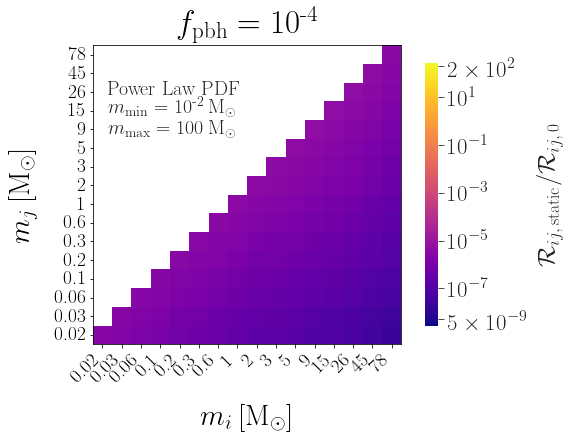

In [2]:
# Plot of merger ratios for binaries with and without DM spikes
# having Power Law PDF in mass range (1e-2 - 100) M_sun using f_pbh = 1e-4.


Merger_PWR2_nohalo = np.load('Merger_PWR2_nohalo.npy')
Merger_PWR2_halo_method_2 = np.load('Merger_PWR2_halo_method_2.npy')

Merger_PWR22_ratio = np.divide(Merger_PWR2_halo_method_2, Merger_PWR2_nohalo)


mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(7, 5.5))  


sns.set(font_scale = 2.1)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'

ax = sns.heatmap(Merger_PWR22_ratio, mask = mask,  cmap = 'plasma', cbar = True, norm = norm,
                 cbar_kws = {"shrink": 0.88,"pad": 0.06},
                 fmt = '0.8f')



cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize= 23, length= 5.5, width= 0.8, which="major")
cbar.ax.tick_params(labelsize= 23, length= 0, width= 0, which="minor")
cbar.set_label('$\mathcal{R}_{ij,\,\mathrm{static}}/\mathcal{R}_{ij,\,0}$' , labelpad = 10)

ticks =  [5e-9, 1e-7, 1e-5,  1e-3, 0.1, 10, 200]
cbar.set_ticks(ticks)
cbar.set_ticklabels([ticks for ticks in tick_list])


ax.set_xticklabels(m_1_list, rotation = 45, fontsize = 10, ha = 'right')
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)




ax.text(0.8, 13.4, "Power Law PDF", size = 20)
ax.text(0.8, 12.4, "$m_\mathrm{{min}} =10\\textsuperscript{-2} \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 11.3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(0.8)


ax.invert_yaxis()
plt.xticks(fontsize = 19.6)
plt.yticks(fontsize = 19.6)
plt.xlabel('$m_{i}\:[\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)   # m_j = m_2
plt.ylabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)  # m_i = m_1  and m_2< equal to m_1.
plt.title("$ f_\mathrm{pbh}  =  10\\textsuperscript{-4}$", fontsize = 33, pad = 12)
plt.savefig('rstPWRLawPDF22.pdf', bbox_inches = 'tight')
plt.show()   

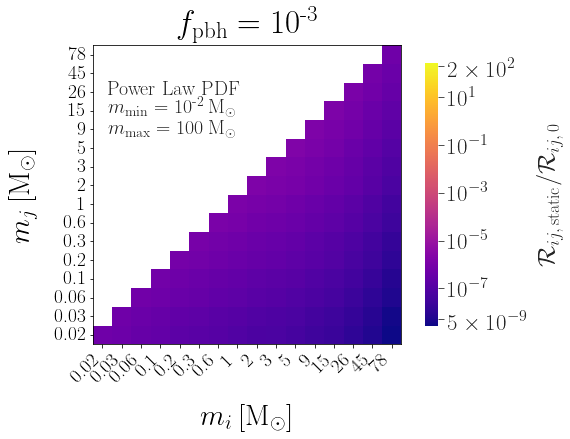

In [2]:
# Plot of merger ratios for binaries with and without DM halos 
# having Power Law PDF in mass range (1e-2 - 100) M_sun using f_pbh = 1e-3.

Merger_PWR3_nohalo = np.load('Merger_PWR3_nohalo.npy')
Merger_PWR3_halo_method_2 = np.load('Merger_PWR3_halo_method_2.npy')


Merger_PWR33_ratio = np.divide(Merger_PWR3_halo_method_2, Merger_PWR3_nohalo)


mask = np.tril(np.ones((16, 16)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(7, 5.5))  


sns.set(font_scale = 2.1)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


ax = sns.heatmap(Merger_PWR33_ratio, mask = mask,  cmap = 'plasma', cbar = True, norm = norm,
                 cbar_kws = {"shrink": 0.88, "pad": 0.06},
                 fmt = '0.8f')



cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize= 23, length= 5.5, width= 0.8, which="major")
cbar.ax.tick_params(labelsize= 23, length= 0, width= 0, which="minor")
cbar.set_label('$\mathcal{R}_{ij,\,\mathrm{static}}/\mathcal{R}_{ij,\,0}$' , labelpad = 10)

ticks = [5e-9, 1e-7, 1e-5,  1e-3, 0.1, 10, 200]
cbar.set_ticks(ticks)
cbar.set_ticklabels([ticks for ticks in tick_list])


ax.set_xticklabels(m_1_list, rotation = 45, fontsize = 10, ha = 'right')
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)


ax.text(0.8, 13.4, "Power Law PDF", size = 20)
ax.text(0.8, 12.4, "$m_\mathrm{{min}} = 10\\textsuperscript{-2} \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 11.3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(0.8)


ax.invert_yaxis()
plt.xticks(fontsize = 19.6)
plt.yticks(fontsize = 19.6)
plt.xlabel('$m_{i}\:[\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)   # m_j = m_2
plt.ylabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 29, labelpad = 17)  # m_i = m_1  and m_2< equal to m_1.
plt.title("$ f_\mathrm{pbh}  =  10\\textsuperscript{-3}$", fontsize = 33, pad = 12)
plt.savefig('rstPWRLawPDF33.pdf', bbox_inches = 'tight')
plt.show()     